<a href="https://colab.research.google.com/github/drstannwoji2019/ML_Projects/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Install required libraries. I already have the libraries, but you can install the ones you don't have
# !pip install pandas scikit-learn seaborn matplotlib
import pandas as pd
import urllib.error  # Import the urllib.error module

# Load and Explore the Dataset

df = pd.read_csv('/spam4ANLY530.csv', encoding="latin-1")

# Rename columns
# The original CSV has 5 columns, so we need 5 names
# We'll keep the original names for the unnamed columns
df.columns = ['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

# Display dataset info
print(df.head())
print(df.info())

# Dataset Overview
# Label: "ham" (not spam) or "spam"
# message: Text of the SMS message

  label                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

In [12]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Encode labels (ham = 0, spam = 1)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Convert text to numerical feature vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [13]:
# Train a Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Naïve Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predictions
y_pred = nb.predict(X_test_tfidf)


Accuracy: 0.9775784753363229

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



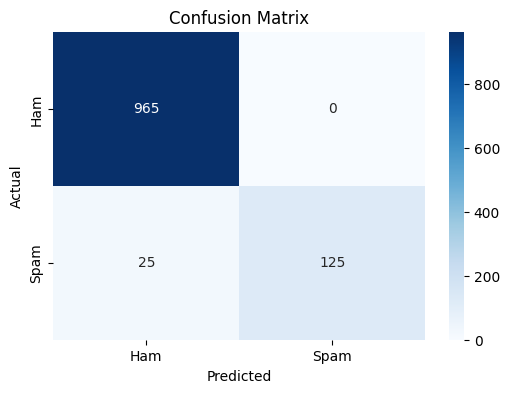

In [14]:
# Evaluate the Model ~ Check the model's accuracy, recall, and F1-score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [15]:
# Test with New Messages
def predict_spam(message):
    message_tfidf = vectorizer.transform([message])  # Transform input text
    prediction = nb.predict(message_tfidf)[0]  # Predict
    return "Spam" if prediction == 1 else "Ham"

# Test messages
test_messages = [
    "Congratulations! You've won a free iPhone. Click here to claim.",
    "Hey, are we still meeting for lunch today?",
    "URGENT! Your account has been suspended. Verify now!",
    "Hi Mom, I’ll call you later."
]

for msg in test_messages:
    print(f"Message: {msg}\nPrediction: {predict_spam(msg)}\n")


Message: Congratulations! You've won a free iPhone. Click here to claim.
Prediction: Spam

Message: Hey, are we still meeting for lunch today?
Prediction: Ham

Message: URGENT! Your account has been suspended. Verify now!
Prediction: Spam

Message: Hi Mom, I’ll call you later.
Prediction: Ham

